In [5]:
# Section 1: Initial Data Overview
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Basic data info
print("Dataset Info:")
print(df.info())
print("\nFirst few rows:")
print(df.head())
print("\nMissing values:")
print(df.isnull().sum())

# Basic descriptive statistics
print("\nDescriptive Statistics:")
print(df.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6894 entries, 0 to 6893
Data columns (total 41 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                6894 non-null   int64  
 1   FoodGroup         6894 non-null   object 
 2   Descrip           6894 non-null   object 
 3   Energy_kcal       6894 non-null   float64
 4   Protein_g         6894 non-null   float64
 5   Fat_g             6894 non-null   float64
 6   Carb_g            6894 non-null   float64
 7   Sugar_g           6894 non-null   float64
 8   Fiber_g           6894 non-null   float64
 9   VitA_mcg          6894 non-null   float64
 10  VitB6_mg          6894 non-null   float64
 11  VitB12_mcg        6894 non-null   float64
 12  VitC_mg           6894 non-null   float64
 13  VitE_mg           6894 non-null   float64
 14  Folate_mcg        6894 non-null   float64
 15  Niacin_mg         6894 non-null   float64
 16  Riboflavin_mg     6894 non-n

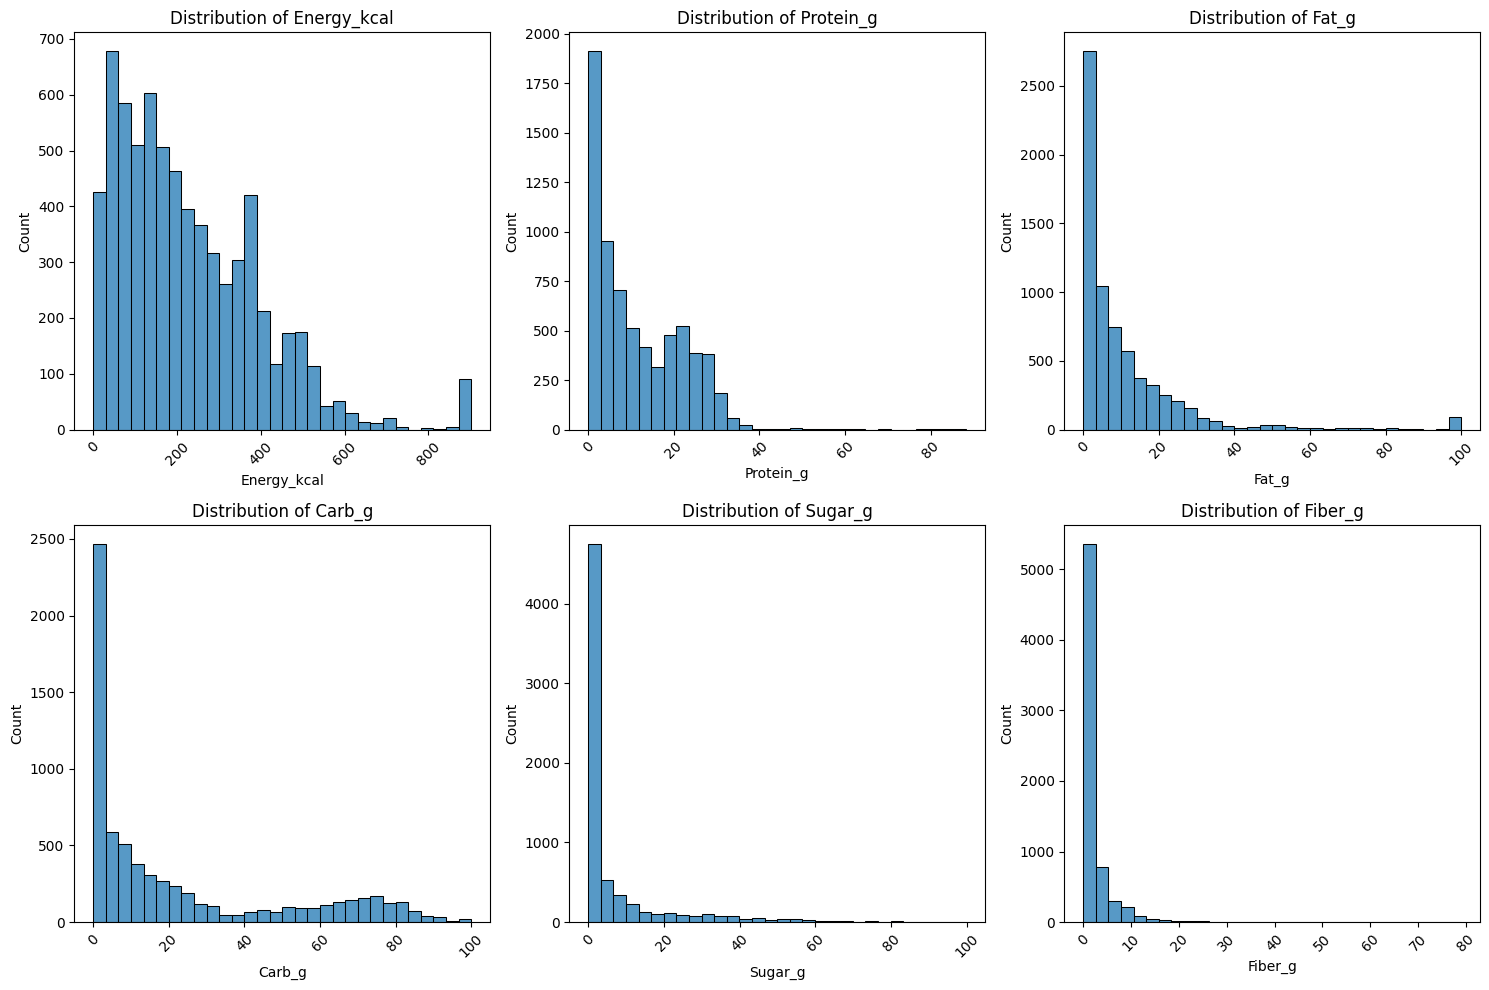


Nutrient Statistics:
       Energy_kcal  Protein_g    Fat_g   Carb_g  Sugar_g  Fiber_g
count      6894.00    6894.00  6894.00  6894.00  6894.00  6894.00
mean        227.00      11.52    10.66    21.96     6.64     2.03
std         170.08      10.50    15.93    27.33    13.77     4.32
min           0.00       0.00     0.00     0.00     0.00     0.00
25%          93.00       2.45     1.00     0.04     0.00     0.00
50%         190.00       8.30     5.22     9.00     0.33     0.30
75%         336.00      20.00    13.82    33.50     5.40     2.40
max         902.00      88.32   100.00   100.00    99.80    79.00

Median values:
Energy_kcal    190.00
Protein_g        8.30
Fat_g            5.22
Carb_g           9.00
Sugar_g          0.33
Fiber_g          0.30
dtype: float64

Percentage of zero values in each nutrient:
Energy_kcal     0.38
Protein_g       3.86
Fat_g           3.77
Carb_g         24.62
Sugar_g        46.68
Fiber_g        47.26
dtype: float64


In [6]:
# Section 2: Distribution of Main Nutrients
# Create subplots for main nutrient distributions
nutrients = ['Energy_kcal', 'Protein_g', 'Fat_g', 'Carb_g', 'Sugar_g', 'Fiber_g']

# Create the subplot grid
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Plot histograms for each nutrient
for i, (ax, nutrient) in enumerate(zip(axes.ravel(), nutrients)):
    sns.histplot(data=df, x=nutrient, ax=ax, bins=30)
    ax.set_title(f'Distribution of {nutrient}')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Basic statistics for these nutrients
print("\nNutrient Statistics:")
print(df[nutrients].describe().round(2))

# Calculate median and mode for each nutrient
print("\nMedian values:")
print(df[nutrients].median().round(2))

# Calculate percentage of zeros in each nutrient
zero_percentages = (df[nutrients] == 0).mean() * 100
print("\nPercentage of zero values in each nutrient:")
print(zero_percentages.round(2))

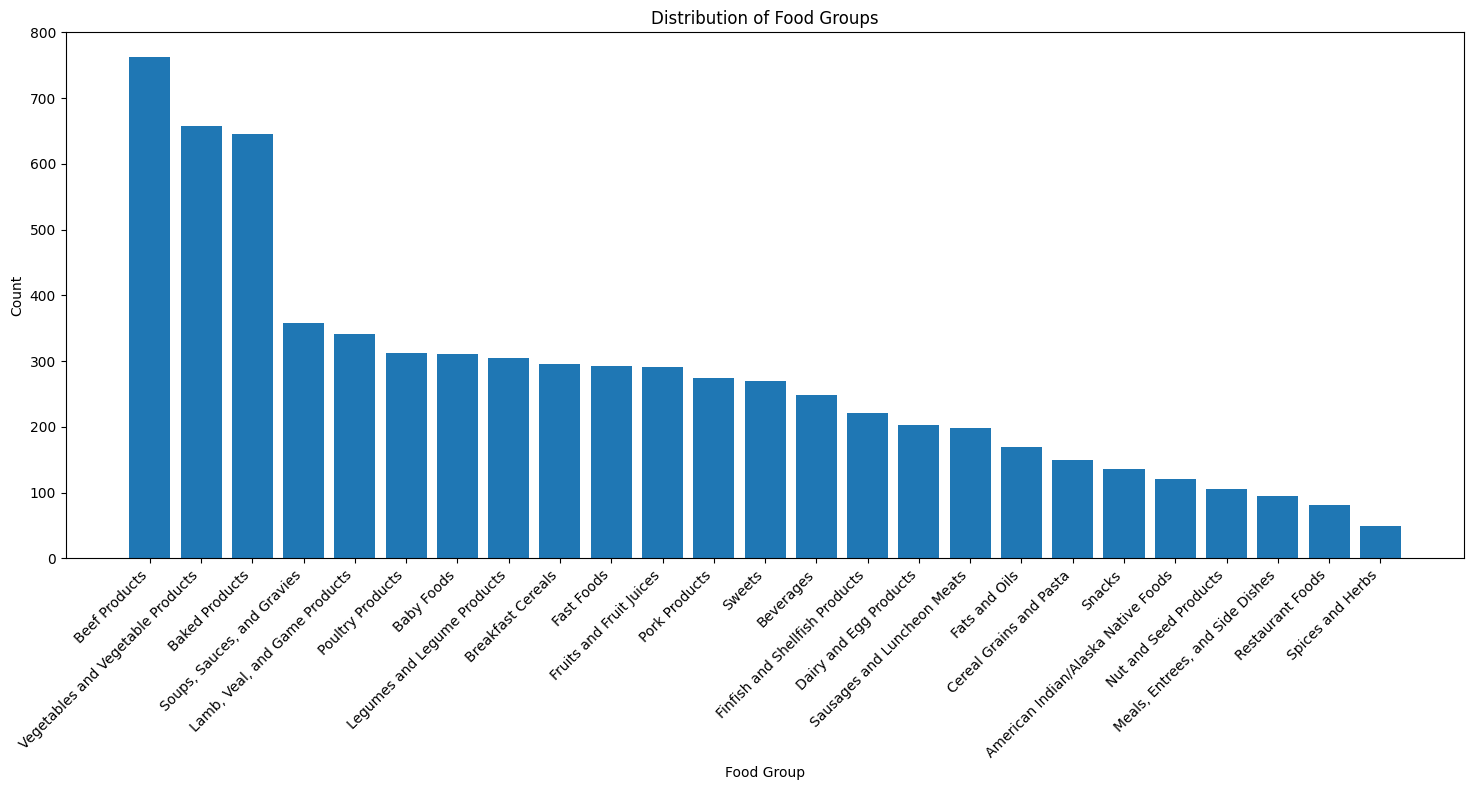

Food Group Distribution:
FoodGroup
Beef Products                          762
Vegetables and Vegetable Products      658
Baked Products                         645
Soups, Sauces, and Gravies             358
Lamb, Veal, and Game Products          342
Poultry Products                       313
Baby Foods                             311
Legumes and Legume Products            305
Breakfast Cereals                      296
Fast Foods                             292
Fruits and Fruit Juices                291
Pork Products                          274
Sweets                                 270
Beverages                              249
Finfish and Shellfish Products         221
Dairy and Egg Products                 203
Sausages and Luncheon Meats            198
Fats and Oils                          169
Cereal Grains and Pasta                149
Snacks                                 136
American Indian/Alaska Native Foods    121
Nut and Seed Products                  106
Meals, Entrees, and

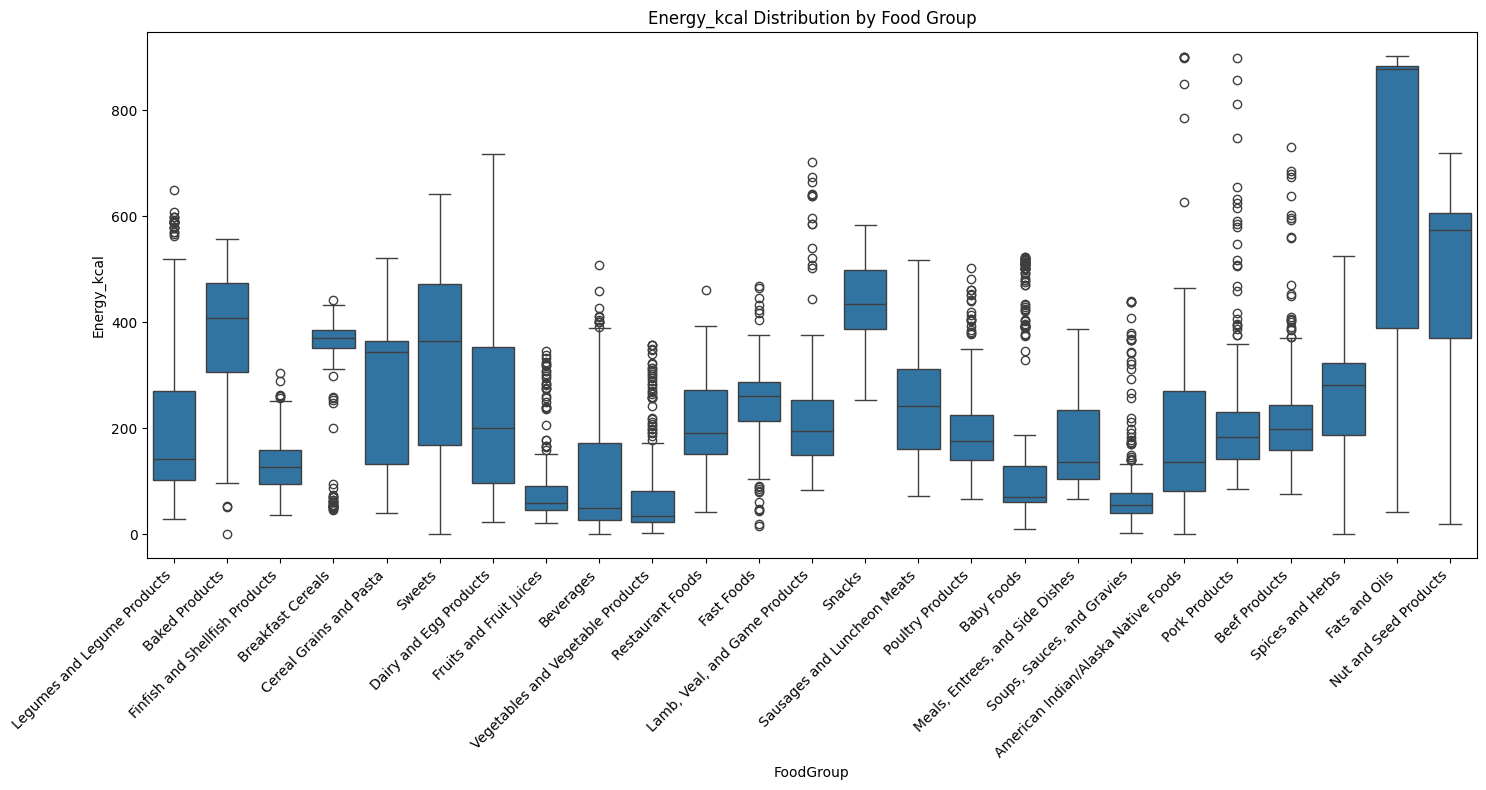

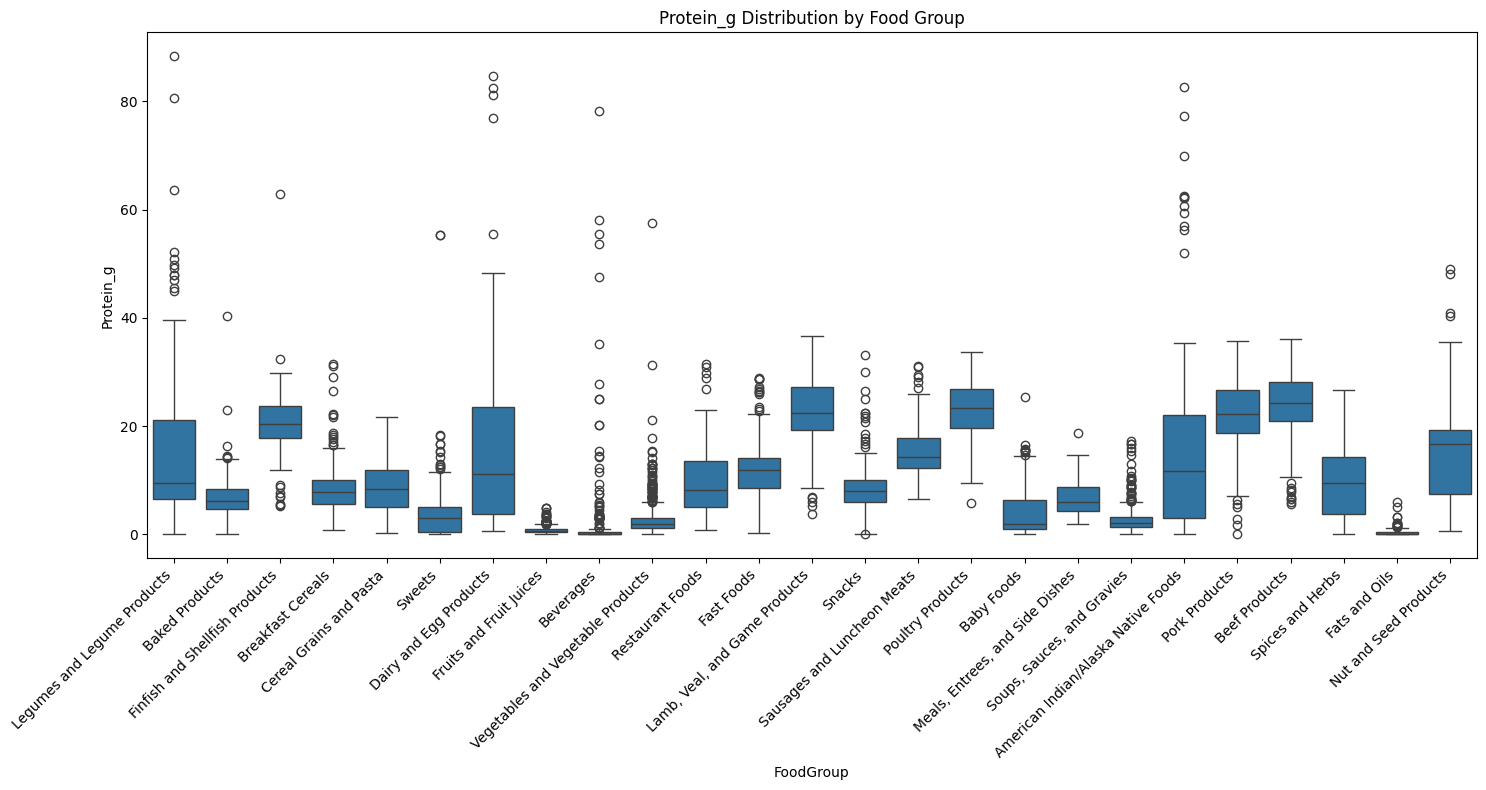

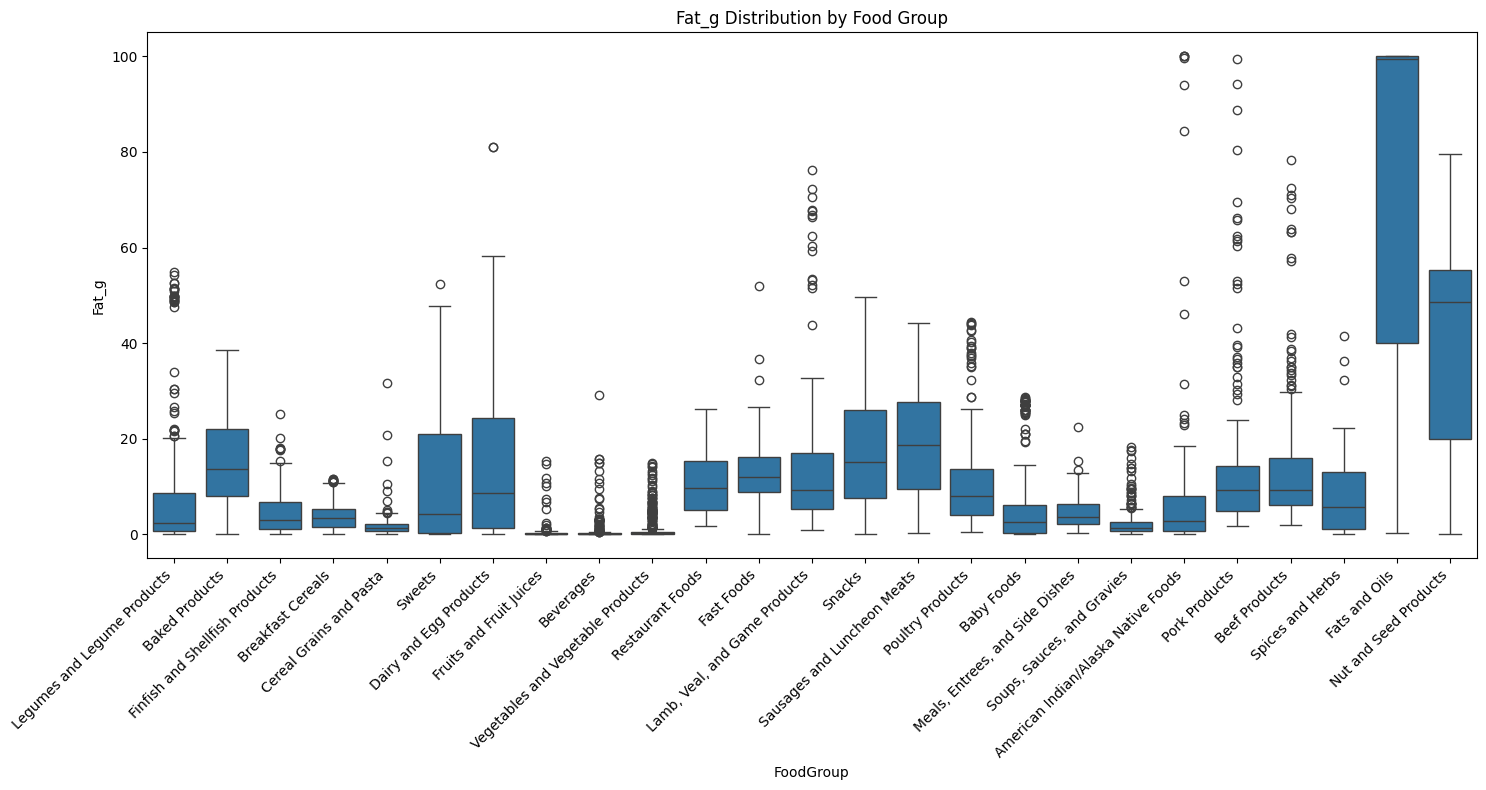


Top 3 food groups for each nutrient:

Energy_kcal:
FoodGroup
Fats and Oils            647.73
Nut and Seed Products    501.44
Snacks                   441.71
Name: Energy_kcal, dtype: float64

Protein_g:
FoodGroup
Beef Products                    24.38
Poultry Products                 23.09
Lamb, Veal, and Game Products    22.98
Name: Protein_g, dtype: float64

Fat_g:
FoodGroup
Fats and Oils                  70.78
Nut and Seed Products          39.49
Sausages and Luncheon Meats    18.48
Name: Fat_g, dtype: float64

Carb_g:
FoodGroup
Breakfast Cereals    74.08
Snacks               64.92
Baked Products       60.00
Name: Carb_g, dtype: float64

Sugar_g:
FoodGroup
Sweets               35.65
Breakfast Cereals    20.31
Baked Products       15.35
Name: Sugar_g, dtype: float64

Fiber_g:
FoodGroup
Spices and Herbs         19.28
Breakfast Cereals         7.72
Nut and Seed Products     6.68
Name: Fiber_g, dtype: float64


In [7]:
# Section 3: Food Group Analysis
# Part 1: Food Group Distribution
plt.figure(figsize=(15, 8))
food_group_counts = df['FoodGroup'].value_counts()

# Create bar plot
plt.bar(range(len(food_group_counts)), food_group_counts.values)
plt.xticks(range(len(food_group_counts)), food_group_counts.index, rotation=45, ha='right')
plt.title('Distribution of Food Groups')
plt.xlabel('Food Group')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Print food group statistics
print("Food Group Distribution:")
print(food_group_counts)

# Part 2: Average nutrients by food group
avg_nutrients = df.groupby('FoodGroup')[nutrients].mean().round(2)
print("\nAverage nutrients by food group:")
print(avg_nutrients)

# Part 3: Box plots for key nutrients across food groups
for nutrient in ['Energy_kcal', 'Protein_g', 'Fat_g']:
    plt.figure(figsize=(15, 8))
    sns.boxplot(data=df, x='FoodGroup', y=nutrient)
    plt.xticks(rotation=45, ha='right')
    plt.title(f'{nutrient} Distribution by Food Group')
    plt.tight_layout()
    plt.show()

# Part 4: Calculate the top 3 food groups for each nutrient
print("\nTop 3 food groups for each nutrient:")
for nutrient in nutrients:
    print(f"\n{nutrient}:")
    top_groups = avg_nutrients[nutrient].nlargest(3)
    print(top_groups)